In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [23]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,twbs/bootstrap,"['javascript', 'css', 'html', 'sass', 'bootstr..."


In [24]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [25]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('javascript', 182),
 ('web', 121),
 ('react', 120),
 ('python', 101),
 ('awesome', 83),
 ('hacktoberfest', 79),
 ('nodejs', 70),
 ('vue', 67),
 ('data', 66),
 ('interview', 62),
 ('spring', 61),
 ('machinelearning', 53),
 ('css', 52),
 ('android', 50),
 ('sql', 50),
 ('go', 49),
 ('api', 47),
 ('test', 47),
 ('deep-learning', 45),
 ('html', 44),
 ('java', 44),
 ('docker', 41),
 ('swift', 40),
 ('algorithm', 38),
 ('programming', 37),
 ('ui', 37),
 ('material', 36),
 ('typescript', 36),
 ('system', 34),
 ('terminal', 34),
 ('git', 34),
 ('macos', 33),
 ('ios', 33),
 ('server', 33),
 ('windows', 31),
 ('linux', 30),
 ('framework', 29),
 ('http', 29),
 ('json', 29),
 ('php', 27),
 ('golang', 26),
 ('rest', 26),
 ('automation', 24),
 ('distributed', 23),
 ('vision', 23),
 ('open-source', 23),
 ('design', 22),
 ('search', 22),
 ('dashboard', 22),
 ('cli', 22),
 ('security', 22),
 ('list', 21),
 ('frontend', 21),
 ('neural', 21),
 ('graphql', 21),
 ('game', 21),
 ('electron', 20),
 ('comma

In [26]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['javascript',
 'web',
 'react',
 'python',
 'awesome',
 'hacktoberfest',
 'nodejs',
 'vue',
 'data',
 'interview',
 'spring',
 'machinelearning',
 'css',
 'android',
 'sql',
 'go',
 'api',
 'test',
 'deep-learning',
 'html',
 'java',
 'docker',
 'swift',
 'algorithm',
 'programming',
 'ui',
 'material',
 'typescript',
 'system',
 'terminal',
 'git',
 'macos',
 'ios',
 'server',
 'windows',
 'linux',
 'framework',
 'http',
 'json',
 'php',
 'golang',
 'rest',
 'automation',
 'distributed',
 'vision',
 'open-source',
 'design',
 'search',
 'dashboard',
 'cli',
 'security',
 'list',
 'frontend',
 'neural',
 'graphql',
 'game',
 'electron',
 'command',
 'microservice',
 'cloud',
 'admin',
 'vedio',
 'leetcode',
 'shell',
 'angular',
 'kubernetes',
 'nlp',
 'vim',
 'tensorflow',
 'style',
 'workflow',
 'animation',
 'bootstrap',
 'language',
 'computer-science',
 'document',
 'monitoring',
 'c',
 'wechat',
 'svg',
 'rust',
 'font',
 'detection',
 'free',
 'devops',
 'es6',
 'cpp',
 'static

In [27]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'javascript css html sass bootstrap scss css',
 'api list development public resources free software api api',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [28]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 217)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vision,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.0,0.346459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.51531,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charlax/professional-programming,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400365,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
tfidf_vector_df.to_excel("TF-IDF_Vector.xlsx",index=False)

In [31]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200958,0.031128,0.089167,0.093599,-0.076462,-0.025827,-0.080545,0.073742,-0.056503,-0.065328,...,-0.005103,-0.021838,-0.008832,0.011725,0.002229,-0.008282,0.046081,-0.041628,-0.006128,-0.005171
996icu/996.ICU,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002067,-0.017500,-0.005727,-0.035697,...,-0.001562,-0.003185,-0.000335,-0.000353,0.000110,-0.004238,0.002883,-0.000024,0.001149,0.001600
EbookFoundation/free-programming-books,-0.032949,-0.043777,-0.115603,0.281728,-0.197702,0.028315,0.117805,0.024107,0.155292,0.067611,...,0.030394,0.019335,0.019320,0.021672,0.042510,0.016253,-0.049137,0.011733,0.028483,0.058957
jwasham/coding-interview-university,-0.054011,0.050652,0.085514,-0.089270,-0.076914,0.115290,0.218216,0.234993,-0.414245,0.192101,...,-0.015039,-0.032182,-0.006329,0.015673,-0.009725,0.003118,-0.025266,-0.000668,0.009232,-0.016297
vuejs/vue,0.333167,0.056013,0.008019,-0.105656,0.096107,-0.008897,0.085937,-0.039476,0.043199,0.115456,...,-0.013383,0.009907,-0.047912,-0.016840,0.017372,-0.017606,-0.001585,-0.008205,-0.012743,-0.009636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002067,-0.017500,-0.005727,-0.035697,...,-0.001562,-0.003185,-0.000335,-0.000353,0.000110,-0.004238,0.002883,-0.000024,0.001149,0.001600
charlax/professional-programming,-0.099201,0.068362,0.041702,-0.077475,-0.145088,0.017839,0.003241,0.102290,-0.097059,0.095548,...,-0.021569,0.049531,-0.034748,-0.017481,-0.007171,-0.012431,0.024321,-0.007361,-0.026200,-0.023973
oracle/graal,0.107569,0.360082,-0.002621,0.093365,0.225647,0.121583,0.149979,0.265049,-0.017938,-0.018089,...,-0.012031,0.018083,0.000670,-0.010173,-0.001800,-0.000385,-0.012996,0.008185,-0.005384,0.015944


In [32]:
# TF-IDF Vector의 모양
df_pca.shape

(1000, 155)

In [33]:
np.array(df_pca)[:,0]

array([ 0.20095804, -0.04622068, -0.03294873, -0.05401142,  0.33316747,
        0.32719627, -0.05267354, -0.0995301 , -0.27932231,  0.28968435,
       -0.03790867,  0.08918815,  0.00599539, -0.14431476, -0.06544405,
        0.04312866, -0.08396653, -0.00432804,  0.19297806, -0.04622068,
       -0.04946819, -0.09620997,  0.12514442, -0.08977834, -0.04622068,
       -0.28551025, -0.04622068, -0.05324248, -0.04622068,  0.22176871,
       -0.09232103, -0.10999431, -0.04953805,  0.04866742, -0.09617034,
        0.42007648,  0.16418916,  0.26190774,  0.4772153 , -0.08742784,
        0.2992903 , -0.05918697,  0.28226536,  0.08631158,  0.26688505,
        0.29713898,  0.07227856,  0.10968937,  0.09631427, -0.04622068,
        0.31613886,  0.09640328,  0.24411317, -0.10965113, -0.11987717,
       -0.05308042, -0.04137278,  0.04921896,  0.32713013, -0.19342342,
       -0.10650367, -0.04622068, -0.09318291, -0.04622068, -0.04622068,
       -0.05752013,  0.45178072, -0.04596343, -0.02875742, -0.05

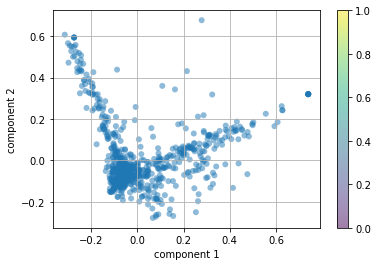

In [34]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [35]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.9491437765285536

In [36]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

156

In [37]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.025179,0.034078,0.034078
pca2,0.019579,0.026499,0.060577
pca3,0.016527,0.022368,0.082945
pca4,0.015722,0.021278,0.104223
pca5,0.014630,0.019800,0.124023
...,...,...,...
pca151,0.001235,0.001672,0.942847
pca152,0.001196,0.001618,0.944466
pca153,0.001191,0.001611,0.946077
pca154,0.001149,0.001556,0.947633


In [164]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=4)

In [165]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=4)

In [166]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과

array([0, 1, 1, 1, 3, 0, 1, 1, 2, 3])

In [167]:
# 군집의 중심
kmeans.cluster_centers_

array([[ 1.37270713e-01, -1.22333716e-01,  2.87697829e-01,
         1.84664482e-01, -2.19449614e-02, -4.77663904e-02,
         2.29120707e-02, -3.16080747e-02,  1.99385525e-02,
        -1.92388043e-02, -2.44908360e-02, -7.45318358e-03,
         6.39133265e-03, -1.42073042e-02, -2.83211113e-02,
         4.48883516e-03,  5.02772600e-03, -7.79911217e-03,
         1.89379987e-03, -3.92667701e-03, -2.00249272e-03,
         1.00347454e-02,  4.95755171e-04,  5.91730589e-03,
        -9.47897969e-04,  1.84242610e-04, -1.00713505e-03,
         1.19526571e-02,  8.49482670e-03, -2.26831164e-03,
         9.41519739e-03,  4.16095468e-03, -5.72738113e-03,
        -1.82864107e-03,  2.06076646e-03,  3.61002322e-04,
        -3.67380511e-03, -4.09648467e-03,  2.86514907e-03,
         9.80124773e-03,  6.01672665e-03, -1.97276540e-04,
         2.31145032e-03, -9.56545614e-03, -8.50602261e-04,
        -2.00267271e-03,  3.56715401e-03,  3.72695882e-03,
        -4.16496977e-03, -1.09781316e-03, -7.88571995e-0

In [168]:
kmeans.labels_[0:8]

array([0, 1, 1, 1, 3, 0, 1, 1])

In [169]:
y_kmeans[:5]

array([0, 1, 1, 1, 3])

In [170]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

653.2724397995047

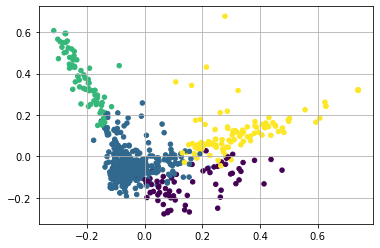

In [171]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [172]:
np.array(df_pca)

array([[ 2.00958036e-01,  3.11284905e-02,  8.91673065e-02, ...,
        -4.16280961e-02, -6.12826820e-03, -5.17124978e-03],
       [-4.62206816e-02, -3.80140052e-02, -3.11040208e-02, ...,
        -2.44667175e-05,  1.14850772e-03,  1.59973951e-03],
       [-3.29487268e-02, -4.37768746e-02, -1.15602530e-01, ...,
         1.17325091e-02,  2.84831044e-02,  5.89571750e-02],
       ...,
       [ 1.07569203e-01,  3.60082381e-01, -2.62110718e-03, ...,
         8.18453909e-03, -5.38391317e-03,  1.59441033e-02],
       [-9.47858181e-03, -7.28674179e-02,  4.53615059e-02, ...,
        -5.70884813e-03, -2.10846499e-02,  8.30446157e-04],
       [-2.74868057e-01,  5.94010037e-01,  1.39275522e-01, ...,
         1.87776290e-02,  2.06602079e-02,  1.95123860e-02]])

C:\Users\assay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


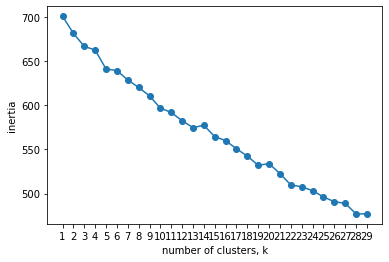

In [173]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [174]:
y_kmeans.shape

(1000,)

In [175]:
np.array(df_pca).shape

(1000, 155)

In [176]:
np.unique(y_kmeans)

array([0, 1, 2, 3])

In [177]:
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_kmeans)
silh = silhouette_samples(np.array(df_pca), y_kmeans, metric='euclidean')

In [178]:
silh

array([-0.03874082,  0.33239312,  0.07149348,  0.09819836, -0.01364627,
        0.01349847,  0.10129504,  0.11073963,  0.11301637, -0.03008063,
        0.098669  ,  0.06533032,  0.07764979,  0.06483778,  0.08302148,
        0.08892824,  0.10331269,  0.08037138, -0.03878676,  0.33239312,
        0.08724439,  0.07454904,  0.0599232 ,  0.09957802,  0.33239312,
        0.11831187,  0.33239312,  0.09302068,  0.33239312, -0.0325324 ,
        0.09946464,  0.10232108,  0.09366466, -0.00929263,  0.10619444,
        0.03887386,  0.01815574, -0.00216916,  0.05675569,  0.10607118,
       -0.02025414,  0.09922048, -0.02719639, -0.00144255, -0.01944507,
       -0.02149704,  0.06133006, -0.04544515,  0.07210583,  0.33239312,
        0.10006228,  0.08076379, -0.01346801,  0.074383  ,  0.08855291,
        0.09864363,  0.09973064,  0.0752459 ,  0.02580714,  0.0070283 ,
        0.10121118,  0.33239312,  0.11834259,  0.33239312,  0.33239312,
        0.04762038,  0.03566993,  0.10378488,  0.09452502,  0.09

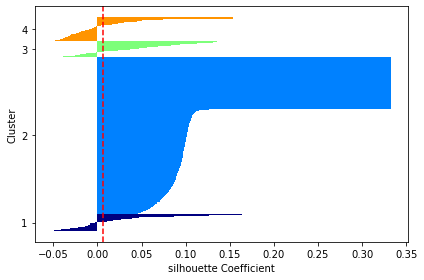

In [179]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0,0
yticks = []
n_clusters = cluster_labels.shape[0]

for i, c in enumerate(cluster_labels):
    c_silh = silh[y_kmeans==c]
    c_silh.sort()
    
    y_ax_upper += len(c_silh)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silh,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_upper + y_ax_lower) / 2.)
    y_ax_lower += len(c_silh)

silh_avg = np.mean(c_silh)
plt.axvline(silh_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('silhouette Coefficient')
#plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [136]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['elastic/elasticsearch',
   'doocs/advanced-java',
   'ggreer/the_silver_searcher',
   'google-research/google-research',
   'sharkdp/fd',
   'remoteintech/remote-jobs',
   'elastic/kibana',
   'meilisearch/MeiliSearch']),
 (1,
  ['996icu/996.ICU',
   'EbookFoundation/free-programming-books',
   'jwasham/coding-interview-university',
   'kamranahmedse/developer-roadmap',
   'sindresorhus/awesome',
   'public-apis/public-apis',
   'getify/You-Dont-Know-JS',
   'donnemartin/system-design-primer',
   'CyC2018/CS-Notes',
   'ohmyzsh/ohmyzsh',
   'flutter/flutter',
   'github/gitignore',
   'microsoft/vscode',
   'torvalds/linux',
   'danistefanovic/build-your-own-x',
   'TheAlgorithms/Python',
   'airbnb/javascript',
   'Snailclimb/JavaGuide',
   'jackfrued/Python-100-Days',
   'ytdl-org/youtube-dl',
   'd3/d3',
   'facebook/react-native',
   'labuladong/fucking-algorithm',
   'ossu/computer-science',
   'jlevy/the-art-of-command-line',
   'golang/go',
   'kubernetes/kubernetes',
 

In [28]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [29]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('nodejs', 59),
  ('javascript', 37),
  ('web', 18),
  ('test', 10),
  ('react', 8),
  ('hacktoberfest', 8),
  ('api', 5),
  ('koa', 5),
  ('electron', 4),
  ('version', 4),
  ('cloud', 4),
  ('education', 3),
  ('learn-to-code', 3),
  ('awesome', 3),
  ('windows', 3)],
 [('awesome', 74),
  ('react', 71),
  ('web', 61),
  ('spring', 61),
  ('hacktoberfest', 56),
  ('interview', 49),
  ('sql', 49),
  ('data', 47),
  ('android', 46),
  ('go', 46),
  ('java', 41),
  ('docker', 38),
  ('swift', 38),
  ('api', 34),
  ('algorithm', 33)],
 [('python', 78),
  ('machinelearning', 42),
  ('deep-learning', 42),
  ('neural', 21),
  ('data', 15),
  ('tensorflow', 13),
  ('face-swap', 13),
  ('web', 7),
  ('hacktoberfest', 7),
  ('scikit-learn', 7),
  ('api', 6),
  ('nlp', 6),
  ('note', 6),
  ('java', 6),
  ('pytorch', 6)],
 [('javascript', 122),
  ('react', 42),
  ('vue', 37),
  ('html', 34),
  ('web', 34),
  ('css', 27),
  ('frontend', 15),
  ('ui', 15),
  ('typescript', 14),
  ('material', 14)

In [30]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[freeCodeCamp/freeCodeCamp, electron/electron,...",44,"[(nodejs, 59), (javascript, 37), (web, 18), (t..."
1,1,"[996icu/996.ICU, EbookFoundation/free-programm...",769,"[(awesome, 74), (react, 71), (web, 61), (sprin..."
2,2,"[tensorflow/tensorflow, vinta/awesome-python, ...",79,"[(python, 78), (machinelearning, 42), (deep-le..."
3,3,"[vuejs/vue, facebook/react, twbs/bootstrap, tr...",108,"[(javascript, 122), (react, 42), (vue, 37), (h..."


In [31]:
df_cluster.to_excel("packages_TF-IDF_kmeans_clusters.xlsx",index=False)

# DBSCAN Clustering

In [32]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0,  1,  0, -1,  0, -1, -1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1,  8, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0, -1,  3, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  3, -1, -1,  4, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  2, -1,  0,
        0, -1, -1, -1, -1, -1, -1,  5, -1, -1,  0,  0, -1, -1, -1, -1,  5,
       -1, -1, -1,  2,  3,  4, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1,  2, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1

In [33]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['freeCodeCamp/freeCodeCamp',
   'EbookFoundation/free-programming-books',
   'jwasham/coding-interview-university',
   'vuejs/vue',
   'facebook/react',
   'kamranahmedse/developer-roadmap',
   'sindresorhus/awesome',
   'tensorflow/tensorflow',
   'public-apis/public-apis',
   'twbs/bootstrap',
   'getify/You-Dont-Know-JS',
   'donnemartin/system-design-primer',
   'CyC2018/CS-Notes',
   'ohmyzsh/ohmyzsh',
   'flutter/flutter',
   'github/gitignore',
   'microsoft/vscode',
   'trekhleb/javascript-algorithms',
   'TheAlgorithms/Python',
   'danistefanovic/build-your-own-x',
   'airbnb/javascript',
   'Snailclimb/JavaGuide',
   'd3/d3',
   'electron/electron',
   'labuladong/fucking-algorithm',
   'jlevy/the-art-of-command-line',
   'facebook/create-react-app',
   'golang/go',
   'axios/axios',
   '30-seconds/30-seconds-of-code',
   'justjavac/free-programming-books-zh_CN',
   'nodejs/node',
   'kubernetes/kubernetes',
   'denoland/deno',
   'microsoft/terminal',
   'angular/an

In [34]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [35]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 177),
  ('react', 120),
  ('web', 119),
  ('python', 89),
  ('nodejs', 71),
  ('hacktoberfest', 68),
  ('vue', 68),
  ('data', 66),
  ('awesome', 64),
  ('interview', 63),
  ('sql', 54),
  ('machinelearning', 53),
  ('android', 51),
  ('test', 48),
  ('api', 47)],
 [('flutter', 3),
  ('dotnet', 2),
  ('dotnet-core', 2),
  ('slideshow', 1),
  ('slides', 1),
  ('presentations', 1),
  ('koa', 1),
  ('knowledge', 1),
  ('hangzhou', 1),
  ('dart', 1),
  ('deprecated', 1),
  ('not-maintained', 1),
  ('waifu2x', 1),
  ('torch', 1),
  ('super-resolution', 1)],
 [('python', 11),
  ('queue', 4),
  ('task', 3),
  ('awesome', 1),
  ('collections', 1),
  ('asynchronous', 1),
  ('numpy', 1),
  ('redis', 1),
  ('amqp', 1),
  ('sqs', 1),
  ('finance', 1),
  ('trading', 1),
  ('fintech', 1),
  ('algotrading', 1),
  ('quant', 1)],
 [('computer-science', 5),
  ('awesome', 4),
  ('courses', 2),
  ('curriculum', 1),
  ('meetup', 1),
  ('programming', 1),
  ('theory', 1),
  ('papers', 1),
 

In [36]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, EbookFoundation/fr...",696,"[(javascript, 177), (react, 120), (web, 119), ..."
1,0,"[996icu/996.ICU, torvalds/linux, jackfrued/Pyt...",247,"[(flutter, 3), (dotnet, 2), (dotnet-core, 2), ..."
2,1,"[vinta/awesome-python, jobbole/awesome-python-...",6,"[(python, 11), (queue, 4), (task, 3), (awesome..."
3,2,"[ossu/computer-science, papers-we-love/papers-...",5,"[(computer-science, 5), (awesome, 4), (courses..."
4,3,"[spring-projects/spring-boot, macrozheng/mall,...",8,"[(spring, 37), (java, 4), (docker, 3), (framew..."
5,4,"[chrislgarry/Apollo-11, florinpop17/app-ideas,...",7,"[(hacktoberfest, 7), (apollo, 1), (nasa, 1), (..."
6,5,"[tailwindlabs/tailwindcss, necolas/normalize.c...",5,"[(css, 10), (postcss, 1), (responsive, 1), (ut..."
7,6,"[MunGell/awesome-for-beginners, dypsilon/front...",5,"[(awesome, 10), (list, 4), (beginner-project, ..."
8,7,"[Leaflet/Leaflet, zenorocha/clipboard.js, Reac...",7,"[(javascript, 7), (maps, 1), (leaflet, 1), (cl..."
9,8,"[laravel/laravel, symfony/symfony, ziadoz/awes...",9,"[(php, 22), (framework, 3), (laravel, 2), (hac..."
